Name: Zihan Qin

Github: zihan-qin

USCID: 8130 9206 33

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('../data/Folds5x2_pp.xlsx',sheet_name=0)

In [3]:
print('The data set has %d rows and %d columns.'%(data.shape[0],data.shape[1]))

The data set has 9568 rows and 5 columns.


The columns of the data represent different information about the data. The rows represent different sample.

<font color= #DCDCDC>**ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.**

Text(0.5, 0.98, 'scatter plot of independent variables')

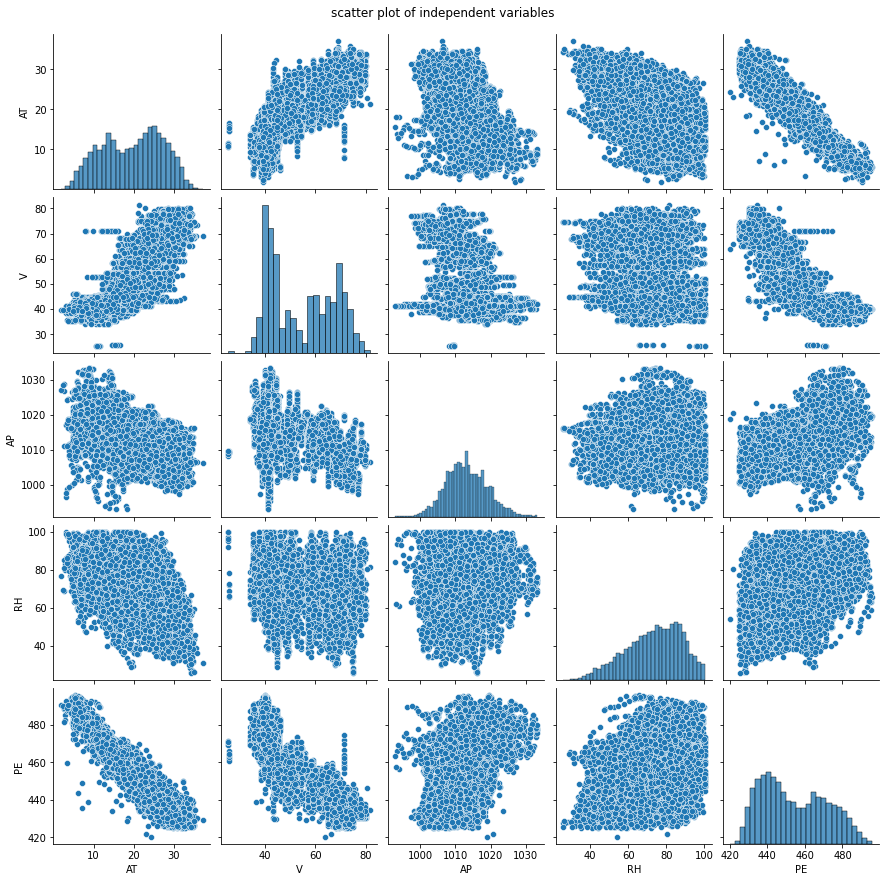

In [4]:
#display independent variables in scatter plot
ax = sns.pairplot(data,vars=data.columns,kind="scatter")
ax.fig.subplots_adjust(top=0.95)
ax.fig.suptitle("scatter plot of independent variables")

1. The dependent variable PE has a strong negative relationship with  AT and V.

2. Some independent variables are correlated, like AT and V.

3. Not all variables are normal distribution.

**iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.**

In [5]:
agg = data.aggregate(['mean','median','min','max'])

In [6]:
rang = {}
q1 = {}
q3 = {}
interq = {}
for i in agg:
    rang[i] = agg[i]['max'] - agg[i]['min']
    q1[i] = np.percentile(data[i],25)
    q3[i] = np.percentile(data[i],75)
    interq[i] = q3[i] - q1[i]

In [7]:
agg = agg.append(rang,ignore_index=True)
agg = agg.append(q1,ignore_index=True)
agg = agg.append(q3,ignore_index=True)
agg = agg.append(interq,ignore_index=True)
agg.index= ['mean','median','min','max','range','q1','q3','interquartile']
agg = agg.drop(['min','max'],axis=0)

In [8]:
agg

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
range,35.300000,56.200000,40.410000,74.600000,75.500000
q1,13.510000,41.740000,1009.100000,63.327500,439.750000
q3,25.720000,66.540000,1017.260000,84.830000,468.430000
interquartile,12.210000,24.800000,8.160000,21.502500,28.680000


The mean, median, range, q1, q3, interquartile is above.


**(c)**

**For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?**

Set alpha = 10%

In [9]:
mse = {}
mse['univariate'] = {}
train_R2 = {}
predict = {}
coef = {}
train_p = {}
for i in ['AT','V','AP','RH']:
    x,y = data[i],data['PE']
    new_trainx = sm.add_constant(x)
    model = sm.OLS(y,new_trainx)
    model = model.fit()
    predict[i] = model.predict(new_trainx)
    train_R2[i] = round(model.rsquared,3)
    coef[i] = model.params
    train_p[i] = model.pvalues[1]
    mse['univariate'][i] = mean_squared_error(y,predict[i])
    print(i)
    print(model.summary2())

AT
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.899     
Dependent Variable: PE               AIC:                59516.4764
Date:               2022-02-11 15:17 BIC:                59530.8088
No. Observations:   9568             Log-Likelihood:     -29756.   
Df Model:           1                F-statistic:        8.510e+04 
Df Residuals:       9566             Prob (F-statistic): 0.00      
R-squared:          0.899            Scale:              29.438    
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
const      497.0341    0.1564  3177.2804  0.0000  496.7275  497.3408
AT          -2.1713    0.0074  -291.7152  0.0000   -2.1859   -2.1567
-------------------------------------------------------------------
Omnibus:             417.457       Durbin-Watson:         

In [10]:
print(train_R2)

{'AT': 0.899, 'V': 0.757, 'AP': 0.269, 'RH': 0.152}


In [11]:
print(train_p)

{'AT': 0.0, 'V': 0.0, 'AP': 0.0, 'RH': 0.0}


All predictors are statistically significant with alpha = 10%. But AT model is the most significantly one in terms of R^2.

Text(0.5, 1.0, 'the error distribution of different predictors')

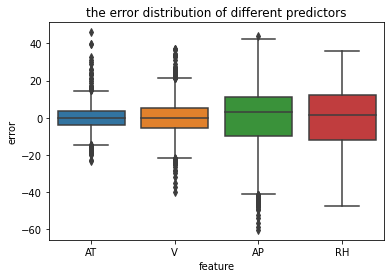

In [12]:
for i in predict:
    predict[i] = predict[i]-y
error = pd.DataFrame(predict)
error = error.melt(var_name='feature',value_name='error')
sns.boxplot(x='feature',y='error',data=error)
plt.title('the error distribution of different predictors')

The model with higher R^2 will have more concentrate error distribution. Because there are some points with extremely large error, so they might be the outlier should be removed.

Text(0.5, 1.0, 'the box plot of features')

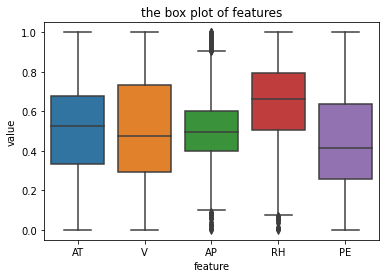

In [13]:
box_data = MinMaxScaler().fit_transform(data)
box_data = pd.DataFrame(box_data,columns = ['AT','V','AP','RH','PE'])
box_data = box_data.melt(var_name='feature',value_name='value')
sns.boxplot(x='feature',y='value',data=box_data)
plt.title('the box plot of features')

According to the boxplot and the distribution of predictors, there are some outliers in predictor AP and RH.

**(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?**

set alpha = 10%

In [14]:
traindata = data.copy()
y = traindata.pop('PE')

In [15]:
new_trainx = sm.add_constant(traindata)
model = sm.OLS(y,new_trainx)
model = model.fit()
predict = model.predict(new_trainx)
mse['multivariate'] = mean_squared_error(y,predict)
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.929     
Dependent Variable: PE               AIC:                56186.2290
Date:               2022-02-11 15:17 BIC:                56222.0599
No. Observations:   9568             Log-Likelihood:     -28088.   
Df Model:           4                F-statistic:        3.114e+04 
Df Residuals:       9563             Prob (F-statistic): 0.00      
R-squared:          0.929            Scale:              20.778    
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
const      454.6093    9.7485    46.6337  0.0000  435.5001  473.7184
AT          -1.9775    0.0153  -129.3420  0.0000   -2.0075   -1.9475
V           -0.2339    0.0073   -32.1221  0.0000   -0.2482   -0.2196
AP           0.0621    0.0095     6.5641  0.0000    0.0435  

All predictors are statistically significant under alpha = 10% according to their p value. So we can reject their null hypothesises.

**(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.**

The multiple regression model have higher R^2 which means it can predict the indicator better.

In [16]:
multi_coef = model.params
multi_coef = multi_coef[1:]
uni_coef = [list(coef.values())[i][1] for i in range(4)]

In [17]:
multi_coef

AT   -1.977513
V    -0.233916
AP    0.062083
RH   -0.158054
dtype: float64

Text(0.5, 1.0, 'multi_coef and uni_coef')

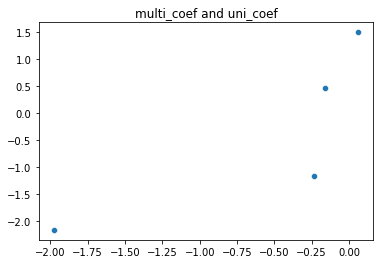

In [18]:
sns.scatterplot(x=multi_coef,y=uni_coef,)
plt.title('multi_coef and uni_coef')

The coefficients are different between univariate models and multiple regression model. The coefficients of the same predictor RH even different in sign. A possible explanation is that there might be correlationship between RH and other predictors.

**(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form**

Set alpha = 10%

In [19]:
mse['poly'] = {}
for i in ['AT','V','AP','RH']:
    traindata = data.loc[:,[i,'PE']]
    traindata.columns = ['x','y']
    model = smf.ols(formula='y~x+I(x**2)+I(x**3)',data = traindata).fit()
    predict = model.predict(traindata)
    mse['poly'][i] = mean_squared_error(traindata['y'],predict)
    print(i)
    print(model.summary2())

AT
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.912     
Dependent Variable: y                AIC:                58209.9482
Date:               2022-02-11 15:17 BIC:                58238.6129
No. Observations:   9568             Log-Likelihood:     -29101.   
Df Model:           3                F-statistic:        3.299e+04 
Df Residuals:       9564             Prob (F-statistic): 0.00      
R-squared:          0.912            Scale:              25.675    
--------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept   492.7281    0.6729  732.2476  0.0000  491.4091  494.0472
x            -0.6103    0.1235   -4.9411  0.0000   -0.8525   -0.3682
I(x ** 2)    -0.1251    0.0069  -18.1989  0.0000   -0.1386   -0.1117
I(x ** 3)     0.0027    0.0001   22.5942  0.0000    0.002

Let the squares and cubes of predictors be new predictors. According to the pre-set alpha and p-value, they are all statistically significant except for v^2.

In [20]:
traindata = data.loc[:,['V','PE']]
traindata.columns = ['x','y']
model = smf.ols(formula='y~x+I(x**3)',data = traindata).fit()
predict = model.predict(traindata)
mse['poly']['V'] = mean_squared_error(traindata['y'],predict)
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.775     
Dependent Variable: y                AIC:                67176.4410
Date:               2022-02-11 15:17 BIC:                67197.9395
No. Observations:   9568             Log-Likelihood:     -33585.   
Df Model:           2                F-statistic:        1.647e+04 
Df Residuals:       9565             Prob (F-statistic): 0.00      
R-squared:          0.775            Scale:              65.546    
--------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept   556.8069    1.4374  387.3725  0.0000  553.9893  559.6245
x            -2.2937    0.0407  -56.4167  0.0000   -2.3734   -2.2140
I(x ** 3)     0.0001    0.0000   28.0467  0.0000    0.0001    0.0001
------------------------------------------------------------

After removing V^2, Predictor V, V^3 are both statistically significant.

**(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.**

Set alpha = 10%

In [21]:
model = smf.ols(formula='PE~AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH',data = data).fit()
predict = model.predict(data)
mse['interaction'] = mean_squared_error(data['PE'],predict)
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.936     
Dependent Variable: PE               AIC:                55118.4140
Date:               2022-02-11 15:17 BIC:                55197.2420
No. Observations:   9568             Log-Likelihood:     -27548.   
Df Model:           10               F-statistic:        1.405e+04 
Df Residuals:       9557             Prob (F-statistic): 0.00      
R-squared:          0.936            Scale:              18.572    
--------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept    685.7825   78.6401   8.7205  0.0000  531.6313  839.9337
AT            -4.3470    2.3731  -1.8318  0.0670   -8.9989    0.3048
V             -7.6749    1.3508  -5.6819  0.0000  -10.3226   -5.0271
AT:V           0.0210    0.0009  23.3378  0.0000    0.0192  

The predictor AT:AP, V:RH, AT are not statistically significant, remove it from the model in order.

1. Remove AT:AP

2. Remove V:RH.

In [22]:
model = smf.ols(formula='PE~AT*V+AT*RH+V*RH+V*AP+AP*RH',data = data).fit()
predict = model.predict(data)
mse['interaction'] = mean_squared_error(data['PE'],predict)
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.936     
Dependent Variable: PE               AIC:                55116.9802
Date:               2022-02-11 15:17 BIC:                55188.6420
No. Observations:   9568             Log-Likelihood:     -27548.   
Df Model:           9                F-statistic:        1.561e+04 
Df Residuals:       9558             Prob (F-statistic): 0.00      
R-squared:          0.936            Scale:              18.572    
--------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept   672.2783   76.5607    8.7810  0.0000  522.2031  822.3536
AT           -2.5633    0.0773  -33.1592  0.0000   -2.7148   -2.4118
V            -8.4649    0.8490   -9.9704  0.0000  -10.1292   -6.8007
AT:V          0.0209    0.0009   23.3458  0.0000    0.0192  

Remove V:RH

In [23]:
model = smf.ols(formula='PE~AT*V+AT*RH+V*AP+AP*RH',data = data).fit()
predict = model.predict(data)
mse['interaction'] = mean_squared_error(data['PE'],predict)
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.936     
Dependent Variable: PE               AIC:                55117.7703
Date:               2022-02-11 15:17 BIC:                55182.2659
No. Observations:   9568             Log-Likelihood:     -27550.   
Df Model:           8                F-statistic:        1.756e+04 
Df Residuals:       9559             Prob (F-statistic): 0.00      
R-squared:          0.936            Scale:              18.575    
--------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept   660.8593   76.2617    8.6657  0.0000  511.3701  810.3485
AT           -2.6146    0.0709  -36.8602  0.0000   -2.7537   -2.4756
V            -8.1375    0.8261   -9.8502  0.0000   -9.7569   -6.5181
AT:V          0.0204    0.0008   24.1166  0.0000    0.0188  

remove AP

In [24]:
model = smf.ols(formula='PE~AT*V+AT*RH+V:AP+AP:RH',data = data).fit()
predict = model.predict(data)
mse['interaction'] = mean_squared_error(data['PE'],predict)
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.936     
Dependent Variable: PE               AIC:                55118.8118
Date:               2022-02-11 15:17 BIC:                55176.1412
No. Observations:   9568             Log-Likelihood:     -27551.   
Df Model:           7                F-statistic:        2.006e+04 
Df Residuals:       9560             Prob (F-statistic): 0.00      
R-squared:          0.936            Scale:              18.579    
--------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept   527.9313    1.3280  397.5327  0.0000  525.3281  530.5345
AT           -2.5526    0.0614  -41.5956  0.0000   -2.6729   -2.4323
V            -7.0266    0.5258  -13.3632  0.0000   -8.0574   -5.9959
AT:V          0.0199    0.0008   25.0770  0.0000    0.0184  

All remain predictors are statistically significant.

**(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.**


In [25]:
testmse = {}
traindata,testdata = train_test_split(data,test_size=0.3,random_state=100,shuffle=True)
model = smf.ols(formula='PE~AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH+I(AT**2)+I(V**2)+I(AP**2)+I(RH**2)',data = traindata).fit()
predict = model.predict(traindata)
pred_test = model.predict(testdata)
mse['whole'] = mean_squared_error(traindata['PE'],predict)
testmse['whole'] = mean_squared_error(testdata['PE'],pred_test)
print(model.summary2())

                   Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.939     
Dependent Variable:   PE               AIC:                38210.0501
Date:                 2022-02-11 15:17 BIC:                38312.1914
No. Observations:     6697             Log-Likelihood:     -19090.   
Df Model:             14               F-statistic:        7424.     
Df Residuals:         6682             Prob (F-statistic): 0.00      
R-squared:            0.940            Scale:              17.557    
---------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
---------------------------------------------------------------------
Intercept  -8971.4607 1483.1722 -6.0488 0.0000 -11878.9514 -6063.9700
AT            -4.8237    3.7756 -1.2776 0.2014    -12.2251     2.5778
V             -2.3809    1.8042 -1.3196 0.1870     -5.9176     1.1559
AT:V           0.0113    0.0032  3.5902

Above is the model with all interaction and quadratic predictors. Predictor V:RH, AT:AP, V:AP, AT, V^2, V is not statistically significant. Remove it in order and implement the improved model below.

In [26]:
traindata,testdata = train_test_split(data,test_size=0.3,random_state=100,shuffle=True)
model = smf.ols(formula='PE~AT*V+AT*RH+V*AP+AP*RH+I(AT**2)+I(AP**2)+I(RH**2)',data = traindata).fit()
predict = model.predict(traindata)
pred_test = model.predict(testdata)
mse['improved'] = mean_squared_error(traindata['PE'],predict)
testmse['improved'] = mean_squared_error(testdata['PE'],pred_test)
print(model.summary2())

                   Results: Ordinary least squares
Model:               OLS               Adj. R-squared:      0.939     
Dependent Variable:  PE                AIC:                 38206.3814
Date:                2022-02-11 15:17  BIC:                 38288.0944
No. Observations:    6697              Log-Likelihood:      -19091.   
Df Model:            11                F-statistic:         9450.     
Df Residuals:        6685              Prob (F-statistic):  0.00      
R-squared:           0.940             Scale:               17.555    
----------------------------------------------------------------------
             Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
----------------------------------------------------------------------
Intercept  -9545.3802 1281.3667  -7.4494 0.0000 -12057.2677 -7033.4928
AT            -2.5533    0.1113 -22.9487 0.0000     -2.7714    -2.3352
V             -3.1672    1.0931  -2.8976 0.0038     -5.3099    -1.0245
AT:V           0.0088    0

In [27]:
print('train mse:')
{'whole':mse['whole'],'improved':mse['improved']}

train mse:


{'whole': 17.517328605981003, 'improved': 17.5234275634814}

In [28]:
print('test mse:')
testmse

test mse:


{'whole': 19.50539732245511, 'improved': 19.516066424783883}

Above is an improved model with the highest adjusted-R^2 and relevant small MSE and AIC.

(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [29]:
traindata = data.copy()
y = traindata.pop('PE')
trainx,testx,trainy,testy = train_test_split(traindata,y,test_size=0.3,random_state=10,shuffle=True)

In [30]:
error = []
for k in range(1,101,2):    
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(trainx,trainy)
    pred_train = neigh.predict(trainx)
    pred_test = neigh.predict(testx)
    error.append([1/k,mean_squared_error(trainy,pred_train),mean_squared_error(testy,pred_test)])
    error.sort(key = lambda x: x[2])


In [31]:
norm = MinMaxScaler().fit(trainx)
trainx = norm.transform(trainx)
testx = norm.transform(testx)
error_norm = []
for k in range(1,101,2):    
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(trainx,trainy)
    pred_train = neigh.predict(trainx)
    pred_test = neigh.predict(testx)
    error_norm.append([1/k,mean_squared_error(trainy,pred_train),mean_squared_error(testy,pred_test)])
    error_norm.sort(key = lambda x: x[2])

In [32]:
error_df = pd.DataFrame(error,columns=['1/k','train_error','test_error'])
norm_error_df = pd.DataFrame(error_norm,columns=['1/k','train_error','test_error'])
print(error_df.loc[0,:],'\n')
print('normalize:\n',norm_error_df.loc[0,:])

1/k             0.142857
train_error    12.263013
test_error     15.821037
Name: 0, dtype: float64 

normalize:
 1/k             0.142857
train_error    11.239239
test_error     13.892275
Name: 0, dtype: float64


In [33]:
error_plot = error_df.melt(id_vars='1/k',var_name='error_type',value_name='error')
norm_error_plot = norm_error_df.melt(id_vars='1/k',var_name='error_type',value_name='error')

Text(0.5, 1.0, 'Error of knn model')

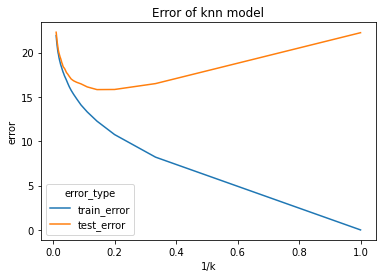

In [34]:
plt.figure()
sns.lineplot(x='1/k',y='error',hue='error_type',data=error_plot)
plt.title('Error of knn model')

Text(0.5, 1.0, 'Error of normalized knn model')

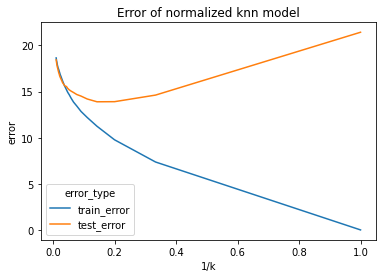

In [35]:
plt.figure()
sns.lineplot(x='1/k',y='error',hue='error_type',data=norm_error_plot)
plt.title('Error of normalized knn model')

The best k of the KNN model are both k = 7, with the test mse 15.82 (without normalization) and 13.89(with normalization).

In [36]:
testmse['knn'] = norm_error_df.loc[0,'test_error']

In [37]:
trainx = trainx.tolist()
trainy = trainy.tolist()
norm_data = pd.DataFrame([trainx[i]+[trainy[i]] for i in range(len(trainy))],columns = ['AT','V','AP','RH','PE'])

In [38]:
model = smf.ols(formula='PE~AT*V+AT*RH+V*AP+AP*RH+I(AT**2)+I(AP**2)+I(RH**2)',data = norm_data).fit()
trainx = pd.DataFrame(trainx,columns=['AT','V','AP','RH'])
testx = pd.DataFrame(testx,columns=['AT','V','AP','RH'])
predict = model.predict(trainx)
pred_test = model.predict(testx)
mse['norm_improved'] = mean_squared_error(trainy,predict)
testmse['norm_improved'] = mean_squared_error(testy,pred_test)
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.936     
Dependent Variable: PE               AIC:                38585.8625
Date:               2022-02-11 15:17 BIC:                38667.5755
No. Observations:   6697             Log-Likelihood:     -19281.   
Df Model:           11               F-statistic:        8864.     
Df Residuals:       6685             Prob (F-statistic): 0.00      
R-squared:          0.936            Scale:              18.578    
--------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept   490.9051    2.4211  202.7641  0.0000  486.1591  495.6512
AT          -82.4291    3.0782  -26.7781  0.0000  -88.4634  -76.3948
V           -30.0467    2.2933  -13.1022  0.0000  -34.5422  -25.5512
AT:V         17.6379    2.9698    5.9390  0.0000   11.8160  

In [39]:
mse

{'univariate': {'AT': 29.431702011093524,
  'V': 70.91465103018827,
  'AP': 212.97249983312634,
  'RH': 246.99922809296353},
 'multivariate': 20.76739753253502,
 'poly': {'AT': 25.664339681466885,
  'V': 65.52586445987316,
  'AP': 211.19742224762015,
  'RH': 246.47407323169548},
 'interaction': 18.563477469131843,
 'whole': 17.517328605981003,
 'improved': 17.5234275634814,
 'norm_improved': 18.545052475972224}

In [40]:
testmse

{'whole': 19.50539732245511,
 'improved': 19.516066424783883,
 'knn': 13.892274759558996,
 'norm_improved': 17.121733205939318}

The improved regression model will be the whole predictors model with normalization preprocessing. But knn model has much less mse than regression model.

**2.4.1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.**

**(a) The sample size n is extremely large, and the number of predictors p is small.**

Ans: flexible learning method.

**(b) The number of predictors p is extremely large, and the number of observations n is small.**

Ans: inflexible learning method.

**(c) The relationship between the predictors and response is highly non-linear.**

Ans: flexible learning method.

**(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.**

Ans: inflexible learning method.

**2.4.7 The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.**

| Obs. | X1 | X2 | X3 | Y |
| --- | --- | --- | --- | --- |
| 1 | 0 | 3 | 0 | Red |
| 2 | 2 | 0 | 0 | Red |
| 3 | 0 | 1 | 3 | Red |
| 4 | 0 | 1 | 2 | Green |
| 5 | -1 | 0 | 1 | Green |
| 6 | 1 | 1 | 1 | Red |

Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

**(a) Compute the Euclidean distance between each observation and the test point,X1 = X2 = X3 = 0.**


| Obs. | Dist |
| --- | --- |
| 1 | 3 |
| 2 | 2 |
| 3 | $\sqrt{10}$ |
| 4 | $\sqrt{5}$ |
| 5 | $\sqrt{2}$ |
| 6 | $\sqrt{3}$ |


**(b) What is our prediction with K = 1? Why?**

Green. Because the prediction will be y of the nearest point, which is observation 5.

**(c) What is our prediction with K = 3? Why?**

Red. Because the prediction will be major result of the 3 nearest point, which is obs 2,5,6.

**(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?**

Small. Because the larger the K is, the more inflexible the boundary will be.

